Title: You Pro-BAYE-bly will FREQUENT this Post Before an Interview
Date: 2019-05-08 10:20
Tags: python
Slug: blog_4

Most Data Science questions deal with studying populations. A population is a set of similar items or events that are of interest for a question or an experiment. Since the task of measuring  an entire population is frequently too expensive and impractical, we take samples, and make inferences about the whole population based on the statistics we find in the sample. In statistical inference we have four key concepts:

                -Samples
                -Statistics
                -Parameters
                -Populations
                
Generally speaking, statistics describe samples and parameters describe populations. Statistical inference is how we move from statistics taken on a sample, to parameters about the whole population. For Frequentists the two main ways we can generalize from a sample to a populations are through Confidence Intervals and Hypothesis Tests. For Bayesians, probability is assigned to a hypothesis, where a prior probability is updated  to a posterior probability, with relevant data. This blog post will outline and compare these two theories in light of Data Science.

# Frequentist Probability

Frequentists have three mathematical concepts that their experiments rely on - the null hypothesis, the associated p value, and the confidence interval. Frequentists have a null hypothesis (known as H0) and an alternate hypothesis (H1). An example of this is if a scientist was running a drug trial where he split the subjects into two groups: those administered the drug and those administered a placebo. The null hypothesis would be the assumption that there was no difference between the two groups. And this would be the stance of the scientist. After this, the scientist would create a reasonable threshold for rejecting the null hypothesis. This notation - α (alpha) - a real number between 0 and 1 - is known as the p value. The p value is the probability of observing a deviation from the null hypothesis which is greater than or equal to the one you observed. Another way of thinking about it, is that the p value is the probability of the data, given that the null hypothesis is true. The scientist will reject the null hypothesis if the p value is below α and not reject otherwise. Alpha is generally set to 0.05. This is considered standard practice.


The best way to explain p value and the null hypothesis is by a drug efficacy example. Let's say that we've just created a new sleeping pill. We've randomly selected 100 people who have problems sleeping; 50 will be administered the sleeping pill, and 50 will be given a placebo. The group given the sleeping pill is the "experiment" group and the group given the placebo is known as the "control" group. In this situation the null hypothesis will be that there will be no difference in the sleeping patterns - hours slept - between the two groups. The alternate hypothesis is that there will be a difference in hours slept between the two groups. The p value (the level of significance) will be .05. Thus, we will reject the null hypothesis if the p value is below .05.

Let's simulate two groups - control and experiment - and their average hours slept per night during the trial.

In [25]:
import numpy as np

control = np.random.randint(2, 10, size=50)
print(control)
experiment = np.random.randint(4, 10, size=50)
print(experiment)

[8 5 7 7 4 5 6 2 6 3 3 8 6 6 7 5 8 3 6 7 4 2 8 3 3 4 9 4 5 3 8 8 5 2 9 3 8
 8 9 2 9 8 7 9 2 3 8 9 8 5]
[6 4 9 9 6 9 8 5 8 4 7 9 7 9 9 5 5 5 4 6 7 6 9 7 6 8 8 5 8 4 4 8 5 7 4 9 5
 5 9 6 5 7 4 8 8 4 9 5 5 7]


In [26]:
print(np.mean(control))
print(np.mean(experiment))
print(np.mean(experiment) - np.mean(control))

5.74
6.52
0.7799999999999994


The measure of difference is 0.78. What is the probability that we observed this data, assuming that the null hypothesis is true?

In [27]:
import scipy.stats as stats

stats.ttest_ind(experiment, control)

Ttest_indResult(statistic=1.8573147670624264, pvalue=0.06626937134706777)

In [39]:
t_stat, p_value = stats.ttest_ind(experiment, control)


The p value is .066, thus we must accept the null hypothesis and state that there is no difference between the sleeping patterns - hours slept - between the experiment and control groups.

The third important key in Frequentist statisitics is the confidence interval. Simply put, a confidence interval is a range of values, in which the actual value is likely to fall. It represents the accuracy or precision of a given estimate. A confidence interval can be calculated as so: 

<img src='images/calculation1.png' alt='calcu1ation1'>


Let's simulate a population and a poll as an example. Say we live in a state and we are working for a newspaper and we are trying to determine whether a certain proposition will pass. Unfortunately, we dont have the time, or the money, to run a poll that will reach out and question all 1 million voters. If we were to run an experiment, we would poll a sample of the society, and then use those samples to make inferences about the whole population. This is how a frequentist would tackle this situation. First I will generate statistics about the state.

In [28]:
import pandas as pd
import numpy as np

np.random.seed(42)
population = np.random.binomial(n= 1, p= 0.60, size = 1_000_000) #similating a population where 60% would vote yes.
population[0:10]

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 0])

In [29]:
sample = np.random.choice(population, size = 500, replace = False)

np.mean(sample)

0.554

In [30]:
sample2 = np.random.choice(population, size = 500, replace = False)

np.mean(sample2)

0.614

In this scenario, the population is 1,000,000, the sample is 500 people, the statistics would be the percentage of people in the sample voting yes on the proposition, and the parameter is the true percentage of people voting yes on the proposition.


We at the newspaper, do not know that 60% of the population would vote for this proposition to pass, but by looking at a sample of 500 voters, we can make educated inferences about how the entire population may vote. This is the Central Limit Theorem in action. This is a probability theory that states that when independent random variables are added their sum tends toward a normal distribution, even if the original variables are not normally distributed. It is this theory that allows for conclusions to be made about the whole population from a sample of the population. Of the sample of the first 500 citizens who were polled, 55.4% responded that they would vote for the proposition to pass. A frequentist would then calculate the margin or error, creating the confidence interval by calculating the mean and the standard deviation and combining this with the associated Z score (1.96). The area under the standard normal distribution between -1.96 and +1.96 is 95%. The confidence interval is a set of likely values for the parameter of interest. 

<img src='images/196.jpg' alt='196'>

In [31]:
sample_mean = np.mean(sample)
sigma = np.std(sample)
n = len(sample)

In [32]:
sample_mean - 1.96 * sigma / (n ** 0.5)
lower = round(sample_mean - 1.96 * sigma / (n ** 0.5), 4)
higher = round(sample_mean + 1.96 * sigma / (n ** 0.5), 4)
f'I am 95% confident that the true population percentage of people who will vote yes on this proposition is between {lower} and {higher}'

'I am 95% confident that the true population percentage of people who will vote yes on this proposition is between 0.5104 and 0.5976'

'I am 95% confident that the true population percentage of people who will vote yes on this proposition is between 0.5104 and 0.5976'

Frequentist statistics allow us to make inferences about the greater population by using a smaller sample of the population and the statistics observed from that sample. The main critiques of Frequentist theory however, is that the p value and the confidence interval depend on the sample size, as Frequentist theory does not perform well on sparse data sets. Moreover, the confidence intervals are not probability distributions. These two flaws in Frequentist theory are remedied in Bayesian Statistics. 

# BAYESIAN PROBABILITY  

Bayesian statistics successfully apply probabilities to statistical problems. In addition to this, it provides the ability to upgrade probabilities with the introduction of new data. It includes three components:

                -The Prior
                -The Likelihood
                -The Posterior
               
The Prior is our belief about paramenters based on previous experience. This takes into account both previous data compiled, in addition to, our own beliefs based on experience.
The Likelihood is the specific observed data.
The Posterior distribution combines the prior and the likelihood. It is the multiplication of the Likelihood and the Prior.
The Posterior distribution is calculated by the following:

<img src='images/calculation.png' alt='calculation'>

For the sake of comparison with Frequentist theory, you could say that the Bayes factor is the equivalent of the p value. The Bayes factor is the ratio of the probability of one hypothesis in relation to the probability of another hypothesis. So for instance, in our sleeping pill example, the ratio of the probability of improved sleeping in the control group vs. that of the experiment group.

The High Density Interval (also known as the Credibility Interval) is the Bayesian equivalent to the Confidence Interval. The Credibility Interval is formed by the posterior distribution. While the Confidence Interval is a collection of intervals with 95% of them containing the true parameter, the Credibility Interval provides an interval that has a 95% chance of containing the true parameter. The Credibility Interval is independent of intentions and sample size. This is good for Data Science, because if we have few data points, we can use strong priors.

Now let's look at the same polling example from above performed with Bayesian inference. First we will create our prior. In this case, let's pretend that based on other statistics we've seen, and previous voting habits in this state, that we have a very strong prior belief that 20% of the state will vote yes on the proposition. 

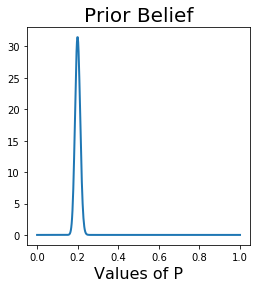

In [56]:
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.stats import binom


alpha_prior = 200
beta_prior = 800

x = np.linspace(0, 1, 500)
prior = beta(alpha_prior, beta_prior)

plt.figure(figsize=(4,4))
plt.plot(x, prior.pdf(x), lw=2);
plt.title('Prior Belief', fontsize=20)
plt.xlabel('Values of P', fontsize=16)
plt.show();

Now we will incorporate our Likelihood and calculate the Posterior based on the Prior and the Likelihood. The Likelihood, calculated by n_trials and n_successes, will be equal to the data that we "collected" above in the Frequentist example.

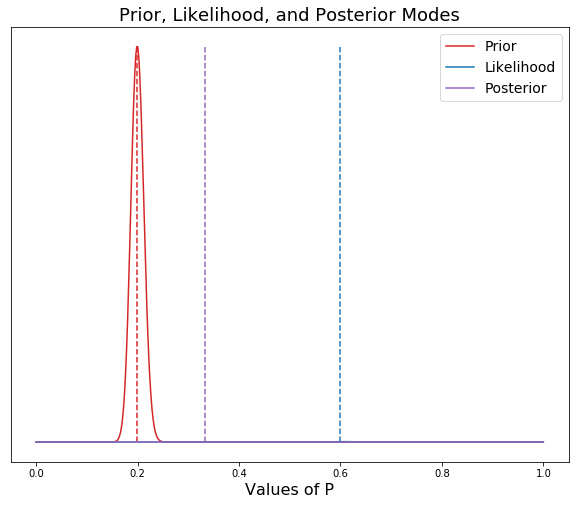

In [34]:
plt.figure(figsize=(10, 8))

x = np.linspace(0,1,500)
a = 200
b = 800
n_trials = 500
n_successes = 300 #copying the data from the sample used above

prior = beta(a, b).pdf(x)
likelihood = binom(n_trials, x).pmf(k=n_successes)
posterior = prior * likelihood

plt.vlines([(a - 1) / (a + b - 2), n_successes / n_trials, (a + n_successes - 1) / (a + b + n_trials - 2)],
               ymin = 0,
               ymax = max(max(prior),max(likelihood), max(posterior)), 
               linestyles = 'dashed',
               colors = ['tab:red', 'tab:blue', 'tab:purple'])
plt.yticks([])


plt.title("Prior, Likelihood, and Posterior Modes", fontsize = 18)
plt.xlabel("Values of P", fontsize = 16)
plt.plot(x, prior, c = 'tab:red', label="Prior")
plt.plot(x, likelihood, c = 'tab:blue', label="Likelihood")
plt.plot(x, posterior, c = 'tab:purple', label='Posterior')
plt.legend(loc = 1, fontsize=14);   



As you can see in the graph above, we have set our priors (a= 200, b= 800) very strong, so that even though the actual data collected was at around 60% voting yes on the proposition, the strength of our priors, has pulled the posterior mean to around 35%. 
If our prior beliefs were not strong, then we would set our alpha and beta much lower. In the following model, I will set them at 2 and 8 to show the effect.

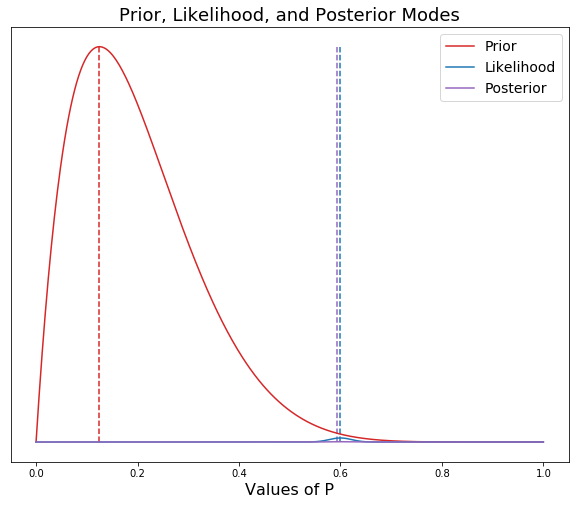

In [35]:
plt.figure(figsize=(10, 8))

x = np.linspace(0,1,500)
a = 2
b = 8
n_trials = 500
n_successes = 300 #copying the data from the sample used above

prior = beta(a, b).pdf(x)
likelihood = binom(n_trials, x).pmf(k=n_successes)
posterior = prior * likelihood

plt.vlines([(a - 1) / (a + b - 2), n_successes / n_trials, (a + n_successes - 1) / (a + b + n_trials - 2)],
               ymin = 0,
               ymax = max(max(prior),max(likelihood), max(posterior)), 
               linestyles = 'dashed',
               colors = ['tab:red', 'tab:blue', 'tab:purple'])
plt.yticks([])


plt.title("Prior, Likelihood, and Posterior Modes", fontsize = 18)
plt.xlabel("Values of P", fontsize = 16)
plt.plot(x, prior, c = 'tab:red', label="Prior")
plt.plot(x, likelihood, c = 'tab:blue', label="Likelihood")
plt.plot(x, posterior, c = 'tab:purple', label='Posterior')
plt.legend(loc = 1, fontsize=14);   



As you can see, with a weaker prior, the posterior is pulled to the left toward the prior, but only slightly. The posterior is being dominated by the data. A perfect example of when you would set a weak prior would be the first example above of a sleeping pill clinical trial. This makes the point that in Bayesian statistics, a prior is not necessary to draw a valuable conclusion (Although, we could specify a weak prior based on expert analysis in the field). In the sleeping pill example, the p value was 0.6, and thus this was interpreted as being insufficient evidence that the sleeping pill worked. There was clearly a difference observed between the two groups, but it was not judged to be sufficient enough of a difference in the standard Frequentist approach. Instead of testing whether two groups are different, Bayesians attempt to measure the difference between the two groups. A topic for a later blog!!!

CONCLUSION

While Frequentists would say that Bayesians incorporating prior beliefs is wrong, the basic idea of not including your prior beliefs, is already making a judgment call about the world. Including priors, results in more accurate distributions, because you're not including the probabilities for data points, that you know from common sense, are not possible. Furthermore, including priors allows us to incorporate expert opinions and specific knowledge into our models. When our model makes a prediction, it provides distribution of likely answers. These predictions are highly interpretable and easier to understand than p values and Confidence Intervals. Finally, if we do not have strong prior beliefs about certain areas, we can always set our prior beleifs to be weak. Thus, our posterior will be dominated by our data, and not our prior. 